TASK 2
NAME :  VAISHNAVI PATIL
DOMAIN : DATA SCIENCE
BRANCH : ARTIFICIAL INTELLIGENCE AND DATA SCIENCE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_movie=pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [4]:

df_movie.shape

(5659, 10)

In [5]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [6]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [7]:
df_movie['Year']= df_movie['Year'].str.strip('()').astype(int)

In [8]:
  df_movie['Votes'] = df_movie['Votes'].astype(str)
df_movie['Votes'] = df_movie['Votes'].str.replace(',','').astype(int)  

In [9]:
df_movie['Duration'] = df_movie['Duration'].str.replace('min','').astype(int)
df_movie['Duration'].fillna(df_movie['Duration'].mean(),inplace=True) 

In [10]:
df_movie.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


<Axes: xlabel='Year', ylabel='Count'>

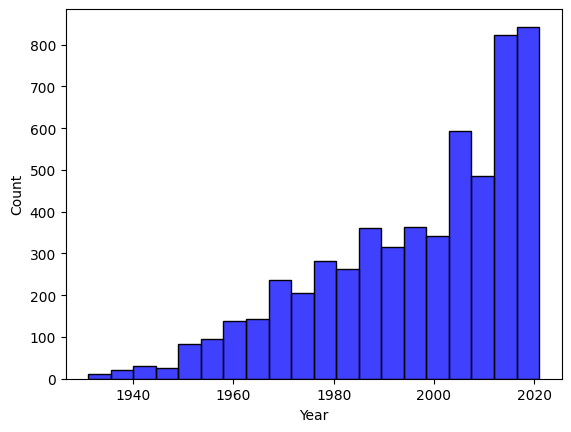

In [11]:
sns.histplot(df_movie['Year'],bins = 20,kde=False,color='blue')

<Axes: xlabel='Duration', ylabel='Count'>

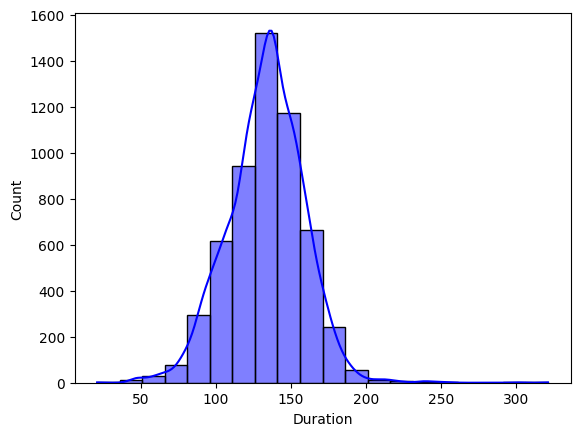

In [12]:
sns.histplot(df_movie['Duration'],bins = 20,kde=True,color='blue')

<Axes: xlabel='Rating', ylabel='Count'>

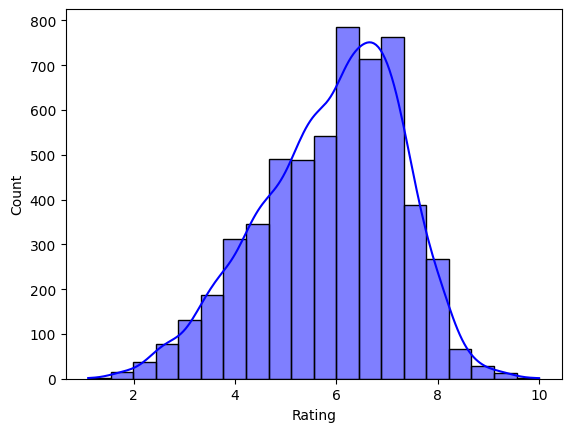

In [13]:
sns.histplot(df_movie['Rating'],bins=20,kde=True,color='blue')

<Axes: xlabel='Votes', ylabel='Count'>

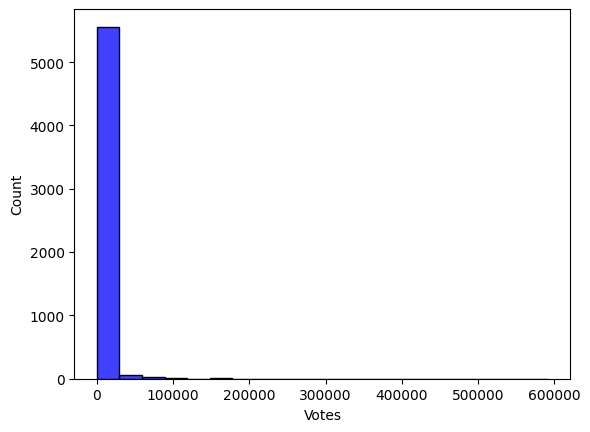

In [14]:
sns.histplot(df_movie['Votes'],bins=20,kde=False,color='blue')

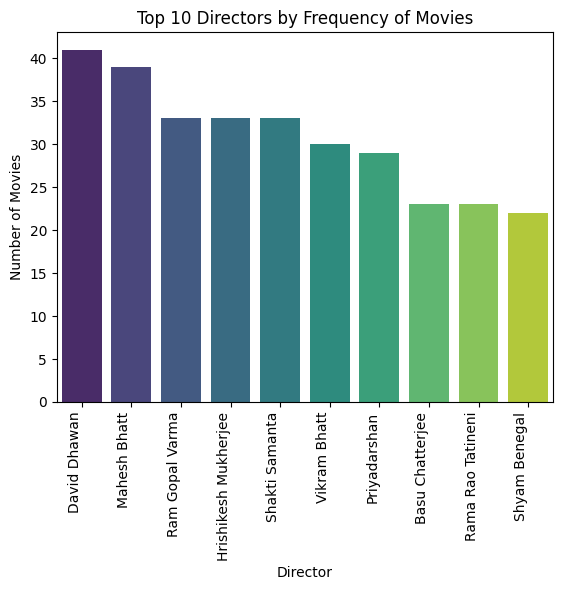

In [15]:
director_counts = df_movie['Director'].value_counts().head(10)
sns.barplot(x=director_counts.index,y=director_counts.values,hue=director_counts.index,palette='viridis')
plt.title('Top 10 Directors by Frequency of Movies')
plt.xlabel('Director') 
plt.ylabel('Number of Movies')
plt.xticks(rotation=90,ha='right') 
plt.show()

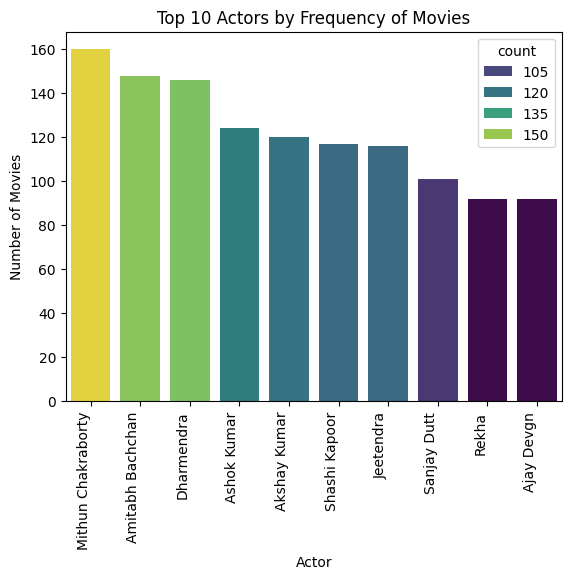

In [16]:
actors = pd.concat([df_movie['Actor 1'],df_movie['Actor 2'],df_movie['Actor 3']]) 
actor_counts = actors.value_counts().head(10) 
sns.barplot(x=actor_counts.index,y=actor_counts.values,hue=actor_counts,palette='viridis') 
plt.title('Top 10 Actors by Frequency of Movies') 
plt.xlabel('Actor') 
plt.ylabel('Number of Movies') 
plt.xticks(rotation = 90,ha = 'right') 
plt.show()

In [17]:
df_movie.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True) 
df_movie.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [18]:
x = df_movie[['Year','Duration','Votes']] 
y = df_movie['Rating']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred) 
mse = mean_squared_error(y_test,y_pred) 
r2 = r2_score(y_test,y_pred) 
print("Mean Absolute Error : ",mae) 
print("Mean Squared Error : ",mse) 
print("R-squared : ",r2) 

Mean Absolute Error :  1.0606062213129308
Mean Squared Error :  1.7073310281488039
R-squared :  0.07798737059748773


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train) 
y_pred_gb = gb_reg.predict(x_test) 
mae_gb = mean_absolute_error(y_test,y_pred_gb) 
mse_gb = mean_squared_error(y_test,y_pred_gb) 
r2_gb = r2_score(y_test,y_pred_gb) 
print("Gradient Boosting Regressor Mean Absolute Error : ",mae_gb)
print("Gradient Boosting Regressor Mean Squared Error : ",mse_gb)
print("Gradient Boosting Regressor R-squared : ",r2_gb)

Gradient Boosting Regressor Mean Absolute Error :  0.8635456636468247
Gradient Boosting Regressor Mean Squared Error :  1.2910751455717662
Gradient Boosting Regressor R-squared :  0.30277868199024716


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
rf_pred = rf.predict(x_test) 
mae = mean_absolute_error(y_test,rf_pred) 
mse = mean_squared_error(y_test,rf_pred) 
r2 = r2_score(y_test,rf_pred) 
print("Mean Absolute Error : ",mae) 
print("Mean Squared Error : ",mse) 
print("R-squared : ",r2) 

Mean Absolute Error :  0.9124746697795727
Mean Squared Error :  1.4886113935770122
R-squared :  0.19610287488381772
